# Angular distance network centrality

Calculate angular (geometric or "simplest") distance centralities from a `cityseer` network.


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from cityseer.metrics import networks
from cityseer.tools import graphs, io


Prepare the network as shown in other examples. Working with the dual graph is recommended.


In [2]:
streets_gpd = gpd.read_file("data/madrid_streets/street_network.gpkg")
streets_gpd = streets_gpd.explode(reset_index=True)
G = io.nx_from_generic_geopandas(streets_gpd)
G_dual = graphs.nx_to_dual(G)

INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 1.
INFO:cityseer.tools.graphs:Converting graph to dual.
INFO:cityseer.tools.graphs:Preparing dual nodes
INFO:cityseer.tools.graphs:Preparing dual edges (splitting and welding geoms)


Use [`network_structure_from_nx`](https://cityseer.benchmarkurbanism.com/tools/io#network-structure-from-nx) from the `cityseer` package's `io` module to prepare the `GeoDataFrames` and `NetworkStructure`.


In [3]:
# prepare the data structures
nodes_gdf, _edges_gdf, network_structure = io.network_structure_from_nx(G_dual)

INFO:cityseer.tools.io:Preparing node and edge arrays from networkX graph.


Use the [`node_centrality_simplest`](https://cityseer.benchmarkurbanism.com/metrics/networks#node-centrality-simplest) function from the `cityseer` package's `networks` module to calculate shortest angular (geometric or "simplest") distance centralities. The function requires a `NetworkStructure` and nodes `GeoDataFrame` prepared with the `network_structure_from_nx` function in the previous step.

The function can calculate centralities for numerous distances at once via the `distances` parameter, which accepts a list of distances.

The function returns the nodes `GeoDataFrame` with the outputs of the centralities added as columns. The columns are named `cc_{centrality}_{distance}_ang`. Standard `geopandas` functionality can be used to explore, visualise, or save the results. See the documentation for more information on the available centrality formulations.


In [4]:
distances = [500, 2000]
nodes_gdf = networks.node_centrality_simplest(
    network_structure=network_structure,
    nodes_gdf=nodes_gdf,
    distances=distances,
)
nodes_gdf.head()

INFO:cityseer.metrics.networks:Computing simplest path node centrality.
INFO:cityseer.config:Metrics computed for:
INFO:cityseer.config:Distance: 500m, Beta: 0.008, Walking Time: 6.25 minutes.
INFO:cityseer.config:Distance: 2000m, Beta: 0.002, Walking Time: 25.0 minutes.


,ns_node_idx,x,y,live,weight,primal_edge,primal_edge_node_a,primal_edge_node_b,primal_edge_idx,dual_node,cc_density_500_ang,cc_density_2000_ang,cc_harmonic_500_ang,cc_harmonic_2000_ang,cc_hillier_500_ang,cc_hillier_2000_ang,cc_farness_500_ang,cc_farness_2000_ang,cc_betweenness_500_ang,cc_betweenness_2000_ang
x454839.5-y4476885.3_x454855.9-y4476818.6_k0,0,454848.067543,4.476852e+06,True,1,"LINESTRING (454855.9 4476818.6, 454849.1 44768...",x454855.9-y4476818.6,x454839.5-y4476885.3,0,POINT (454848.067543 4476852.042507),30.0,124.0,12.848804,26.465605,10.168567,18.186932,88.508049,845.442261,0.0,0.0
x454833.6-y4476910.5_x454839.5-y4476885.3_k0,1,454836.577015,4.476898e+06,True,1,"LINESTRING (454839.5 4476885.3, 454838 4476891...",x454839.5-y4476885.3,x454833.6-y4476910.5,0,POINT (454836.577015 4476897.9067),36.0,127.0,14.853752,28.316143,10.232138,18.836437,126.659744,856.265991,136.0,968.0
x454839.5-y4476885.3_x454877.1-y4476893.6_k0,2,454858.300000,4.476889e+06,True,1,"LINESTRING (454839.5 4476885.3, 454877.1 44768...",x454839.5-y4476885.3,x454877.1-y4476893.6,0,POINT (454858.3 4476889.45),33.0,125.0,12.366441,24.028734,9.009537,16.524494,120.871918,945.566040,106.0,752.0
x454823.1-y4476952.1_x454833.6-y4476910.5_k0,3,454828.362585,4.476931e+06,True,1,"LINESTRING (454833.6 4476910.5, 454830.4 44769...",x454833.6-y4476910.5,x454823.1-y4476952.1,0,POINT (454828.362585 4476931.303206),36.0,124.0,15.039588,28.382860,10.302912,18.803555,125.789688,817.717712,165.0,1180.0
x454758.1-y4476894.6_x454833.6-y4476910.5_k0,4,454795.845199,4.476903e+06,True,1,"LINESTRING (454758.1 4476894.6, 454769.8 44768...",x454833.6-y4476910.5,x454758.1-y4476894.6,0,POINT (454795.845199 4476902.571916),33.0,125.0,9.605127,21.297651,8.002337,16.290869,136.085236,959.126282,0.0,0.0


In [5]:
nodes_gdf.columns

Index(['ns_node_idx', 'x', 'y', 'live', 'weight', 'primal_edge',
       'primal_edge_node_a', 'primal_edge_node_b', 'primal_edge_idx',
       'dual_node', 'cc_density_500_ang', 'cc_density_2000_ang',
       'cc_harmonic_500_ang', 'cc_harmonic_2000_ang', 'cc_hillier_500_ang',
       'cc_hillier_2000_ang', 'cc_farness_500_ang', 'cc_farness_2000_ang',
       'cc_betweenness_500_ang', 'cc_betweenness_2000_ang'],
      dtype='object')

In [6]:
nodes_gdf["cc_betweenness_2000_ang"].describe()

count     47129.000000
mean       8083.850098
std       15415.607422
min           0.000000
25%         374.000000
50%        2210.000000
75%        8528.000000
max      227236.000000
Name: cc_betweenness_2000_ang, dtype: float64

(np.float64(438500.0),
 np.float64(442000.0),
 np.float64(4472500.0),
 np.float64(4476000.0))

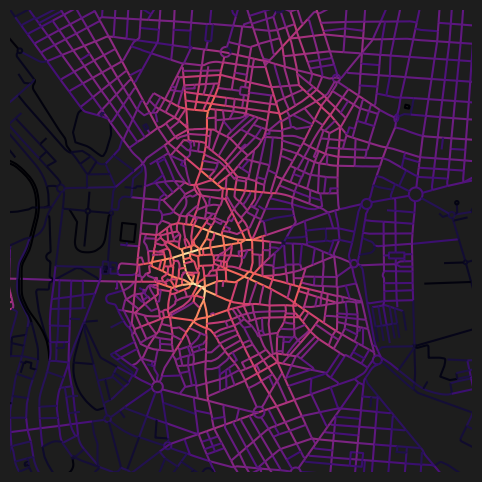

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), facecolor="#1d1d1d")
nodes_gdf.plot(
    column="cc_harmonic_500_ang",
    cmap="magma",
    legend=False,
    ax=ax,
)
ax.set_xlim(438500, 438500 + 3500)
ax.set_ylim(4472500, 4472500 + 3500)
ax.axis(False)

(np.float64(438500.0),
 np.float64(442000.0),
 np.float64(4472500.0),
 np.float64(4476000.0))

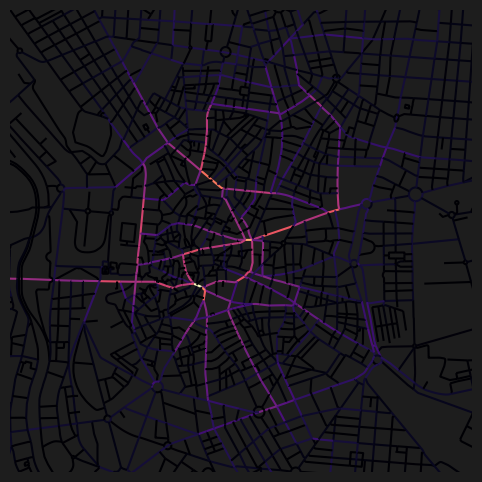

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), facecolor="#1d1d1d")
nodes_gdf.plot(
    column="cc_betweenness_2000_ang",
    cmap="magma",
    legend=False,
    ax=ax,
)
ax.set_xlim(438500, 438500 + 3500)
ax.set_ylim(4472500, 4472500 + 3500)
ax.axis(False)

Alternatively, you can define the distance thresholds using a list of `minutes` instead.


In [9]:
nodes_gdf = networks.node_centrality_simplest(
    network_structure=network_structure,
    nodes_gdf=nodes_gdf,
    minutes=[15],
)

INFO:cityseer.metrics.networks:Computing simplest path node centrality.
INFO:cityseer.config:Metrics computed for:
INFO:cityseer.config:Distance: 1200m, Beta: 0.00333, Walking Time: 15.0 minutes.


The function will map the minutes values into the equivalent distances, which are reported in the logged output. Use the configurable `speed_m_s` parameter to set a custom metres per second walking speed.


In [10]:
nodes_gdf.columns

Index(['ns_node_idx', 'x', 'y', 'live', 'weight', 'primal_edge',
       'primal_edge_node_a', 'primal_edge_node_b', 'primal_edge_idx',
       'dual_node', 'cc_density_500_ang', 'cc_density_2000_ang',
       'cc_harmonic_500_ang', 'cc_harmonic_2000_ang', 'cc_hillier_500_ang',
       'cc_hillier_2000_ang', 'cc_farness_500_ang', 'cc_farness_2000_ang',
       'cc_betweenness_500_ang', 'cc_betweenness_2000_ang',
       'cc_density_1200_ang', 'cc_harmonic_1200_ang', 'cc_hillier_1200_ang',
       'cc_farness_1200_ang', 'cc_betweenness_1200_ang'],
      dtype='object')

As per the function logging outputs, 15 minutes has been mapped to 1200m at default `speed_m_s`, so the corresponding outputs can be visualised using the 1200m columns.


(np.float64(438500.0),
 np.float64(442000.0),
 np.float64(4472500.0),
 np.float64(4476000.0))

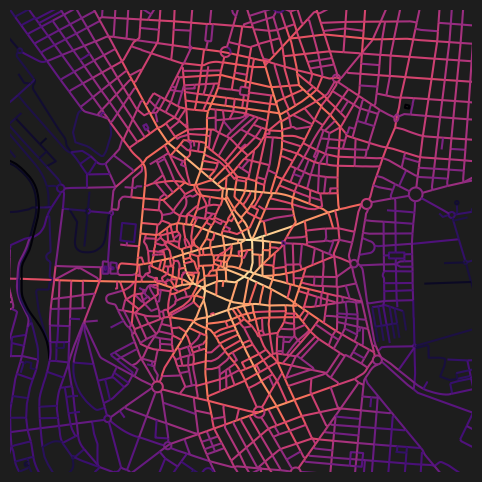

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), facecolor="#1d1d1d")
nodes_gdf.plot(
    column="cc_harmonic_1200_ang",
    cmap="magma",
    legend=False,
    ax=ax,
)
ax.set_xlim(438500, 438500 + 3500)
ax.set_ylim(4472500, 4472500 + 3500)
ax.axis(False)